#Import Library

In [117]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google_drive_downloader import GoogleDriveDownloader as gdd

#Download & Load Data
Drive link : https://drive.google.com/file/d/1Xfs7L2_49U_xuklVSugirYmSo1KCHWPe/view?usp=sharing

In [22]:
gdd.download_file_from_google_drive(file_id='1Xfs7L2_49U_xuklVSugirYmSo1KCHWPe',
                                    dest_path='content/Question_Classification_Dataset.zip',
                                    unzip=True)

Unzipping...Done.


In [24]:
dataframe = pd.read_csv("/content/content/Question_Classification_Dataset/Question_Classification_Dataset.csv")
dataframe.head(10)

,Unnamed: 0,Questions,Category0,Category1
0,0,How did serfdom develop in and then leave Russ...,DESCRIPTION,DESC
1,1,What films featured the character Popeye Doyle ?,ENTITY,ENTY
2,2,How can I find a list of celebrities ' real na...,DESCRIPTION,DESC
3,3,What fowl grabs the spotlight after the Chines...,ENTITY,ENTY
4,4,What is the full form of .com ?,ABBREVIATION,ABBR
5,5,What contemptible scoundrel stole the cork fro...,HUMAN,HUM
6,6,What team did baseball 's St. Louis Browns bec...,HUMAN,HUM
7,7,What is the oldest profession ?,HUMAN,HUM
8,8,What are liver enzymes ?,DESCRIPTION,DESC
9,9,Name the scar-faced bounty hunter of The Old W...,HUMAN,HUM


#Data Preprocessing

In [25]:
#drop kolom yang tidak diperlukan
dataframe = dataframe.drop(columns=['Unnamed: 0', 'Category1'])
dataframe.head()

,Questions,Category0
0,How did serfdom develop in and then leave Russ...,DESCRIPTION
1,What films featured the character Popeye Doyle ?,ENTITY
2,How can I find a list of celebrities ' real na...,DESCRIPTION
3,What fowl grabs the spotlight after the Chines...,ENTITY
4,What is the full form of .com ?,ABBREVIATION


In [26]:
#melakukan one-hot-encoding dan membuat dataframe baru
category = pd.get_dummies(dataframe.Category0)
dataframe_baru = pd.concat([dataframe, category], axis=1)
dataframe_baru = dataframe_baru.drop(columns='Category0')
dataframe_baru

,Questions,ABBREVIATION,DESCRIPTION,ENTITY,HUMAN,LOCATION,NUMERIC
0,How did serfdom develop in and then leave Russ...,0,1,0,0,0,0
1,What films featured the character Popeye Doyle ?,0,0,1,0,0,0
2,How can I find a list of celebrities ' real na...,0,1,0,0,0,0
3,What fowl grabs the spotlight after the Chines...,0,0,1,0,0,0
4,What is the full form of .com ?,1,0,0,0,0,0
...,...,...,...,...,...,...,...
5447,What 's the shape of a camel 's spine ?,0,0,1,0,0,0
5448,What type of currency is used in China ?,0,0,1,0,0,0
5449,What is the temperature today ?,0,0,0,0,0,1
5450,What is the temperature for cooking ?,0,0,0,0,0,1


In [31]:
#mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values
questions = dataframe_baru['Questions'].values
label_list = dataframe["Category0"].drop_duplicates().values.tolist()
label = dataframe_baru[labels].values
label

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]], dtype=uint8)

In [105]:
#membagi data train dan data test
questions_train, questions_test, label_train, label_test = train_test_split(questions, label, test_size=0.2, random_state=42)

In [106]:
print(len(questions_train))
print(len(questions_test))

4361
1091


#Tokenisasi

In [107]:
#tokenisasi dan mengkonversi setiap sampel menjadi sequence
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(questions_train) 
tokenizer.fit_on_texts(questions_test)
 
sekuens_train = tokenizer.texts_to_sequences(questions_train)
sekuens_test = tokenizer.texts_to_sequences(questions_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

#Membangun Model

In [108]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [110]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.80):
      print("\n Accuracy dan Val Accuracy sudah mencapai target training dihentikan")
      self.model.stop_training = True

callbacks = myCallback()

In [111]:
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
137/137 - 6s - loss: 1.6459 - accuracy: 0.2593 - val_loss: 1.5166 - val_accuracy: 0.3786
Epoch 2/30
137/137 - 3s - loss: 1.2904 - accuracy: 0.4731 - val_loss: 1.2082 - val_accuracy: 0.5096
Epoch 3/30
137/137 - 3s - loss: 0.8063 - accuracy: 0.6895 - val_loss: 0.8509 - val_accuracy: 0.6792
Epoch 4/30
137/137 - 3s - loss: 0.4902 - accuracy: 0.8356 - val_loss: 0.7742 - val_accuracy: 0.7314
Epoch 5/30
137/137 - 3s - loss: 0.3059 - accuracy: 0.9023 - val_loss: 0.7853 - val_accuracy: 0.7424
Epoch 6/30
137/137 - 3s - loss: 0.1925 - accuracy: 0.9413 - val_loss: 0.7767 - val_accuracy: 0.7699
Epoch 7/30
137/137 - 3s - loss: 0.1250 - accuracy: 0.9626 - val_loss: 0.8486 - val_accuracy: 0.7800
Epoch 8/30
137/137 - 3s - loss: 0.0832 - accuracy: 0.9784 - val_loss: 0.8591 - val_accuracy: 0.7947
Epoch 9/30
137/137 - 3s - loss: 0.0566 - accuracy: 0.9839 - val_loss: 1.0214 - val_accuracy: 0.7846
Epoch 10/30
137/137 - 3s - loss: 0.0448 - accuracy: 0.9895 - val_loss: 0.9761 - val_accuracy: 0.8038

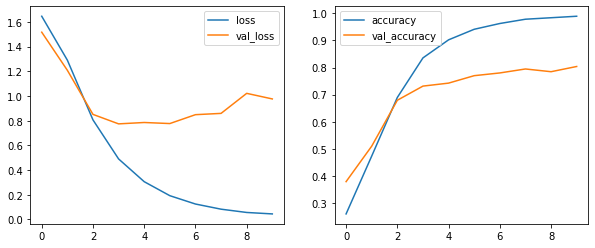

In [112]:
#Plot Loss dan Akurasi dari Trained Model
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

#confusion matrix

In [113]:
predictions = model.predict(padded_test)
predictions[:5]

array([[2.7948961e-04, 3.0814891e-04, 1.5206624e-07, 1.4602001e-04,
        9.8601589e-03, 9.8940605e-01],
       [3.8851088e-01, 5.3349358e-01, 7.0800997e-02, 6.8130242e-03,
        1.0978547e-04, 2.7181831e-04],
       [9.9941492e-01, 8.3733858e-06, 5.7670422e-04, 8.9305630e-09,
        2.0361556e-08, 2.1635844e-09],
       [9.9567282e-01, 2.6789443e-03, 1.6647574e-04, 2.9952064e-06,
        1.4759249e-03, 2.8183201e-06],
       [3.5837593e-06, 7.4173106e-05, 6.1252891e-08, 9.9795794e-01,
        2.0941607e-05, 1.9433169e-03]], dtype=float32)

In [114]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[:5]

array([5, 1, 0, 0, 3])

In [115]:
labels_test = np.argmax(label_test, axis=1)
labels_test[:5]

array([5, 1, 0, 0, 3])

In [116]:
print(classification_report(labels_test, prediction_labels, target_names=label_list))
pd.DataFrame(confusion_matrix(labels_test, prediction_labels), index=label_list, columns=label_list)

              precision    recall  f1-score   support

 DESCRIPTION       0.74      0.84      0.79       227
      ENTITY       0.70      0.70      0.70       246
ABBREVIATION       1.00      0.52      0.69        23
       HUMAN       0.88      0.83      0.85       240
     NUMERIC       0.92      0.94      0.93       189
    LOCATION       0.80      0.75      0.78       166

    accuracy                           0.80      1091
   macro avg       0.84      0.76      0.79      1091
weighted avg       0.81      0.80      0.80      1091



,DESCRIPTION,ENTITY,ABBREVIATION,HUMAN,NUMERIC,LOCATION
DESCRIPTION,191,24,0,0,8,4
ENTITY,44,173,0,10,2,17
ABBREVIATION,6,2,12,3,0,0
HUMAN,4,30,0,199,1,6
NUMERIC,5,2,0,1,177,4
LOCATION,7,15,0,14,5,125
